<a href="https://colab.research.google.com/github/ishan4das/basic_option_pricing/blob/master/Derivative_Pricing_Basics_BSM_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*created with love by Ishan Das* 

I can be reached out @ *https://www.linkedin.com/in/ishandas/* 

In [4]:
import numpy as np 
import pandas as pd
import seaborn as sns 
from math import exp , log  , pi , sqrt
import matplotlib.pyplot as plt 
plt.style.use( 'seaborn' )

## **Plotting the Normal Distribution PDF**

In [ ]:
def std_norm_pdf(x): 
  return ((1/sqrt(2*pi)) * exp(-(x**2)/2)  )

norm_pdf_dist = [] 
loop = [] 

for i in range(0 , 10000):
  j = i / 1000 - 5 
  loop.append( j )  
  norm_pdf_dist.append ( std_norm_pdf(j) )

plt.subplots( figsize = (10 , 5)) 
ax = sns.lineplot( x = loop , y = norm_pdf_dist) 
ax.set(xlabel = 'Random Variable, X' , ylabel = 'Probability Density' , title = 'Normal Distribution')
plt.show()   

### **Plotting the Normal Distribution CDF using approximations (without having to integrate)**

In [ ]:
def norm_cdf_approximation1(x): 
  return ( 1 /  (1 + exp(-1.65451*x ) ) )
#This is one of the simplest approximations of Normal CDF that I found
norm_cdf_dist = [] 
loop = [] 
for i in range( 0 , 10000 ): 
  j = i/1000 - 5 
  loop.append(j)
  norm_cdf_dist.append(norm_cdf_approximation1(j))  

plt.subplots(figsize = (8 , 6 )) 
ax = sns.lineplot(x = loop , y = norm_cdf_dist ) 
ax.set(xlabel = 'Random Variable, X'  , ylabel = 'Cumulative Probability' , title =  'Normal CDF Function'  )
plt.show()

[Various Approximations to the CDF of Normal Distribution (Research Paper)](https://www.ijser.org/researchpaper/Approximations-to-Standard-Normal-Distribution-Function.pdf)

In [ ]:
def norm_cdf_approximation2(x):
  k = 1.0/(1.0+0.2316419*x)
  k_sum = k * (0.319381530 + k * (-0.356563782 + k * (1.781477937 + k * (-1.821255978 + 1.330274429 * k))))
  if x >= 0.0:
    return (1.0 - (1.0 / ((2 * pi)**0.5)) * exp(-0.5 * x * x) * k_sum)
  else:
    return 1.0 - norm_cdf_approximation2(-x)

norm_cdf_dist = []
loop_cdf = []
for i in range(0,10000):
    j = i/1000 - 5
    loop_cdf.append(j)
    norm_cdf_dist.append(norm_cdf_approximation2(j))
    
plt.subplots(figsize=(6,4))
ax = sns.lineplot(x=loop, y=norm_cdf_dist)
ax.set(xlabel="Random Variable", ylabel="Percentage", title="Normal CDF")
plt.show()

In [ ]:
from math import exp, log, pi
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')



def norm_pdf(x):
    return (1.0/((2*pi)**0.5))*exp(-0.5*x*x)

 
norm_pdf_dist = []
loop = []
for i in range(0,10000):
    j = i/1000 - 5
    loop.append(j)
    norm_pdf_dist.append(norm_pdf(j))
    
plt.subplots(figsize=(6,4))
ax = sns.lineplot(x=loop, y=norm_pdf_dist)
ax.set(xlabel="Random Variable", ylabel="Percentage", title="Normal PDF")
plt.show()

## **Black-Scholes-Merton Model for Plain-Vanilla European Call Options**

First I define a function d_j() to calculate the required N(d1) and N(d2) for the B-S-M Model, using d_j(), I define price for vanilla Call & vanilla Put

In [39]:
#v = sigma
def d_j(j , S , K , r , v , T):
  return (log(S/K) + (r + ((-1)**(j-1))*0.5*v*v)*T)/(v*(T**0.5)) 

def norm_cdf(x):
  return (norm_cdf_approximation2(x))
  
def vanilla_call_price(S, K, r, v, T):
    return S * norm_cdf(d_j(1, S, K, r, v, T)) - \
    K*exp(-r*T) * norm_cdf(d_j(2, S, K, r, v, T))

def vanilla_put_price(S, K, r, v, T):
    return -S * norm_cdf(-d_j(1, S, K, r, v, T)) + \
    K*exp(-r*T) * norm_cdf(-d_j(2, S, K, r, v, T))

Payoff curves for European call and put when strike price is fixed at K = 50, and fixed r(risk free rate), v(std. dev.), T(time till expiry) 

* Here modifying the time till expiry will give us payoff curves of similar shapes



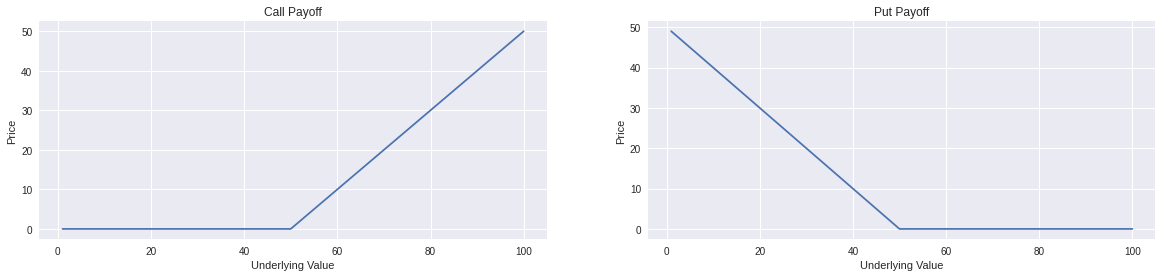

In [45]:
call_payoff = []
put_payoff = []
loop = []

for i in range(1,101):
    loop.append(i)
    call_payoff.append(vanilla_call_price(i, 50, 0.0000001, 0.0000001, 10))
    put_payoff.append(vanilla_put_price(i, 50, 0.0000001, 0.0000001, 10))
    
fig, ax = plt.subplots(1,2, figsize=(20,4))
sns.lineplot(x=loop, y=call_payoff, ax=ax[0])
sns.lineplot(x=loop, y=put_payoff, ax=ax[1])
ax[0].set(title="Call Payoff", xlabel="Underlying Value", ylabel="Price")
ax[1].set(title="Put Payoff", xlabel="Underlying Value", ylabel="Price")
plt.show()


In real markets, the underlying calue of the asset changes continuously, the volatility in the market (v = Std. Dev.) can change, and interests rates (r = risk free rate) may change through time. 

All these factors introduce more unknowns when we are interested in calculating the price of an option.

Below I demonstrate that the *payoff curve* changes significantly when the **asset volatility** is changed.

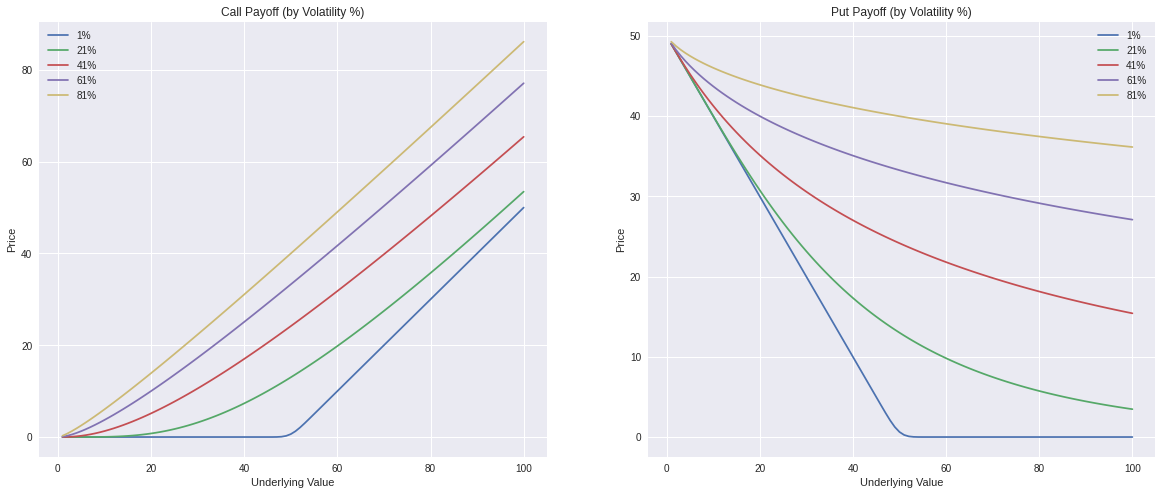

In [50]:
df_call = pd.DataFrame([])
df_put = pd.DataFrame([])
loop = range(1,101)

for v in range(1,101,20):
    sigma = v/100
    df_call_t = pd.DataFrame({'{}%'.format(v): []})
    df_put_t = pd.DataFrame({'{}%'.format(v): []})
    
    for i in range(1,101):
        df_call_t = df_call_t.append({'{}%'.format(v): 
                                      vanilla_call_price(i, 50, 0.0000001, sigma, 10)},
                                     ignore_index=True)
        df_put_t = df_put_t.append({'{}%'.format(v): 
                                    vanilla_put_price(i, 50, 0.0000001, sigma, 10)},
                                   ignore_index=True)
        
    df_call = pd.concat([df_call, df_call_t], axis=1, sort=False)
    df_put = pd.concat([df_put, df_put_t], axis=1, sort=False)

fig, ax = plt.subplots(1,2,figsize=(20,8))
for i in range(5):
    sns.lineplot(x=loop, y=df_call.iloc[:,i], label=df_call.columns.values[i], ax=ax[0])
    sns.lineplot(x=loop, y=df_put.iloc[:,i], label=df_put.columns.values[i], ax=ax[1])
    ax[0].set(title="Call Payoff (by Volatility %)", xlabel="Underlying Value", ylabel="Price")
    ax[1].set(title="Put Payoff (by Volatility %)", xlabel="Underlying Value", ylabel="Price")
    ax[0].legend()
    ax[1].legend()
plt.show()